# Data Preparation with Real and Synthetic Data

### Load real data

In [1]:
import pandas as pd
from data_preparation_utils import *

### BHT data
BHT_1 = pd.read_csv('/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/BHT1.csv', sep=';')
BHT_1.drop(columns=['Unnamed: 0'], inplace=True)

BHT_2 = pd.read_csv('/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/BHT2.csv', sep=';')
BHT_2.drop(columns=['Unnamed: 0'], inplace=True)

BHT_3 = pd.read_csv('/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/BHT3.csv', sep=',')
BHT_3.drop(columns=['Unnamed: 0'], inplace=True)

In [2]:
### THL Data
THL_1 = pd.read_csv('/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/THL1.csv', sep=';')
THL_1.drop(columns=['Unnamed: 0'], inplace=True)

THL_2 = pd.read_csv('/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/THL2.csv', sep=';')
THL_2.drop(columns=['Unnamed: 0'], inplace=True)

THL_3 = pd.read_csv('/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/THL3.csv', sep=',')

### BHT 1

In [3]:
synthetic_BHT1, metadata_BHT1 = generate_synthetic_data(BHT_1)

/Users/rajwaghela/Library/Python/3.9/lib/python/site-packages/sdv/single_table/base.py:119: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

/Users/rajwaghela/Library/Python/3.9/lib/python/site-packages/sdv/single_table/base.py:104: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.



Original data distribution: {1: 233, 0: 28}
Synthetic data distribution: {1: 49, 0: 29}

Original data shape: (261, 7)
Synthetic data shape: (78, 7)


In [4]:
synthetic_BHT1.describe()

,M01_1_N,M02_1_N,M03_1_N,M04_1_N,M05_1_N,M06_1_N,status
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,3.843590,3.494872,4.171795,4.169231,3.412821,4.535897,0.628205
std,1.598017,1.613087,1.437882,1.476685,1.807442,1.264190,0.486412
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.025000,2.175000,3.300000,3.825000,1.100000,4.900000,0.000000
50%,4.800000,3.750000,5.100000,4.950000,4.900000,5.100000,1.000000
75%,5.000000,5.000000,5.100000,5.100000,5.000000,5.100000,1.000000
max,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,1.000000


In [5]:
from sdv.evaluation.single_table import run_diagnostic
diagonistic_report = run_diagnostic(
    real_data=BHT_1,
    synthetic_data=synthetic_BHT1,
    metadata=metadata_BHT1
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 7/7 [00:00<00:00, 981.22it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 234.03it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [10]:
diagonistic_report.get_details(property_name='Data Validity')

,Column,Metric,Score
0,M01_1_N,BoundaryAdherence,1.0
1,M02_1_N,BoundaryAdherence,1.0
2,M03_1_N,BoundaryAdherence,1.0
3,M04_1_N,BoundaryAdherence,1.0
4,M05_1_N,BoundaryAdherence,1.0
5,M06_1_N,BoundaryAdherence,1.0
6,status,CategoryAdherence,1.0


In [11]:
diagonistic_report.get_details(property_name='Data Structure')

,Metric,Score
0,TableStructure,1.0


In [12]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=BHT_1,
    synthetic_data=synthetic_BHT1,
    metadata=metadata_BHT1)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 7/7 [00:00<00:00, 1033.81it/s]|
Column Shapes Score: 57.15%

(2/2) Evaluating Column Pair Trends: |██████████| 21/21 [00:00<00:00, 270.06it/s]|
Column Pair Trends Score: 64.79%

Overall Score (Average): 60.97%



In [13]:
BHT_1['M01_1_N'].unique()

array([5.1, 1.3, 3.7, 1.7, 5. , 3. , 2. , 2.3, 2.7, 1. , 4. , 3.3])

In [14]:
quality_report.get_details(property_name='Column Pair Trends')

,Column 1,Column 2,Metric,Score,Real Correlation,Synthetic Correlation
0,M01_1_N,M02_1_N,CorrelationSimilarity,0.654040,0.717309,0.025389
1,M01_1_N,M03_1_N,CorrelationSimilarity,0.707673,0.512929,-0.071725
2,M01_1_N,M04_1_N,CorrelationSimilarity,0.790453,0.468965,0.049870
3,M01_1_N,M05_1_N,CorrelationSimilarity,0.765381,0.567228,0.097990
4,M01_1_N,M06_1_N,CorrelationSimilarity,0.597759,0.716475,-0.088007
5,M01_1_N,status,ContingencySimilarity,0.185529,NaN,NaN
6,M02_1_N,M03_1_N,CorrelationSimilarity,0.793131,0.430949,0.017210
7,M02_1_N,M04_1_N,CorrelationSimilarity,0.734439,0.447282,-0.083840
8,M02_1_N,M05_1_N,CorrelationSimilarity,0.772538,0.498163,0.043238
9,M02_1_N,M06_1_N,CorrelationSimilarity,0.786542,0.551321,0.124406


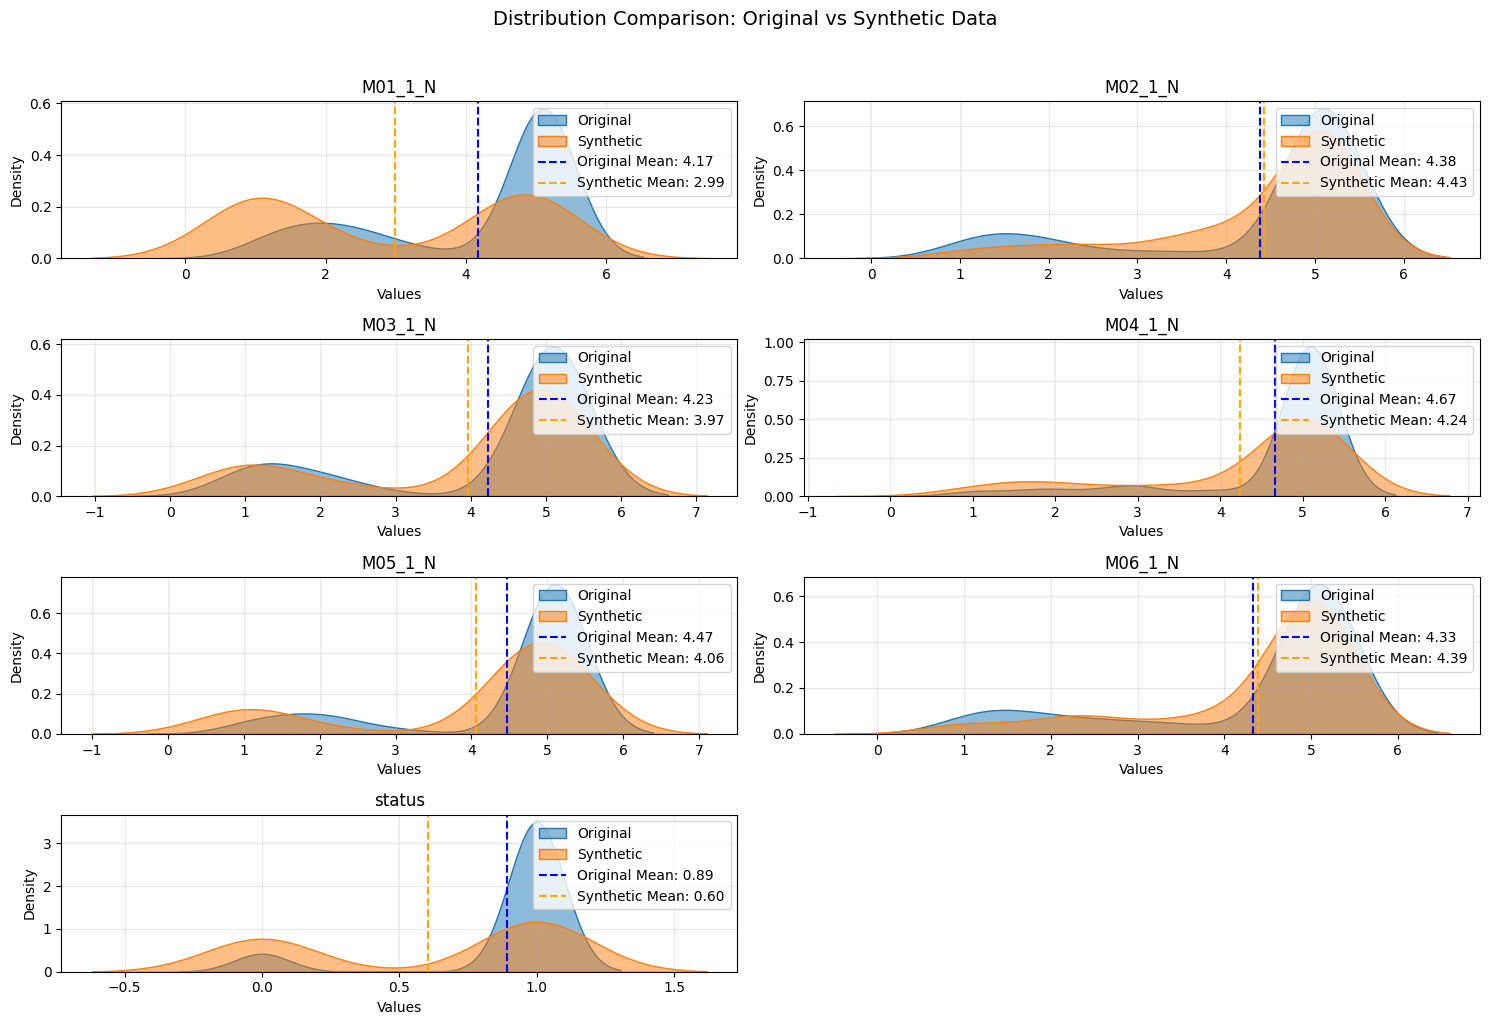

In [15]:
compare_distributions(orginal_df=BHT_1, synthetic_test=synthetic_BHT1)

In [16]:
# Merge stratified split of BHT_1 with synthetic data and get test split
bht1_merged = merge_real_synthetic(BHT_1, synthetic_BHT1)

# Save BHT1 train and test data
save_merged_data(bht1_merged, 'BHT1')

Distribution of status column in merged data:
1    280
0     59
Name: status, dtype: int64


### BHT 2

In [17]:
synthetic_BHT2, metadata_BHT2 = generate_synthetic_data(BHT_2)

/Users/rajwaghela/Library/Python/3.9/lib/python/site-packages/sdv/single_table/base.py:119: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

/Users/rajwaghela/Library/Python/3.9/lib/python/site-packages/sdv/single_table/base.py:104: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.



Original data distribution: {1: 156, 0: 27}
Synthetic data distribution: {1: 34, 0: 20}

Original data shape: (183, 13)
Synthetic data shape: (54, 13)


In [18]:
synthetic_BHT2.describe()

,M01_2_N,M02_2_N,M03_2_N,M04_2_N,M05_2_N,M06_2_N,M07_2_N,M08_2_N,M09_2_N,M10_2_N,M11_2_N,M12_2_N,status
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,2.850000,3.385185,1.988889,4.216667,3.072222,4.175926,2.687037,4.007407,3.861111,3.190741,4.335185,5.048148,0.629630
std,1.729953,1.336908,1.328308,1.178382,1.462541,1.263260,1.768919,1.062012,1.693207,1.820146,1.415568,0.353815,0.487438
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.500000,0.000000
25%,1.000000,2.300000,1.000000,3.725000,1.825000,3.425000,1.000000,3.225000,1.925000,1.000000,4.900000,5.100000,0.000000
50%,2.450000,3.300000,1.350000,4.800000,2.850000,4.850000,1.850000,3.950000,4.900000,3.650000,4.900000,5.100000,1.000000
75%,4.600000,5.000000,2.475000,5.100000,4.800000,5.100000,4.900000,5.100000,5.100000,5.000000,5.000000,5.100000,1.000000
max,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,1.000000


In [19]:
diagonistic_report = run_diagnostic(
    real_data=BHT_2,
    synthetic_data=synthetic_BHT2,
    metadata=metadata_BHT2)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 13/13 [00:00<00:00, 2550.09it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 54.31it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [20]:
quality_report = evaluate_quality(
    real_data=BHT_2,
    synthetic_data=synthetic_BHT2,
    metadata=metadata_BHT2)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 13/13 [00:00<00:00, 1998.46it/s]|
Column Shapes Score: 59.93%

(2/2) Evaluating Column Pair Trends: |██████████| 78/78 [00:00<00:00, 324.93it/s]|
Column Pair Trends Score: 72.46%

Overall Score (Average): 66.2%



In [21]:
quality_report.get_details(property_name='Column Pair Trends')

,Column 1,Column 2,Metric,Score,Real Correlation,Synthetic Correlation
0,M01_2_N,M02_2_N,CorrelationSimilarity,0.587647,0.740842,-0.083865
1,M01_2_N,M03_2_N,CorrelationSimilarity,0.685892,0.621072,-0.007143
2,M01_2_N,M04_2_N,CorrelationSimilarity,0.687407,0.540266,-0.084920
3,M01_2_N,M05_2_N,CorrelationSimilarity,0.647522,0.608868,-0.096087
4,M01_2_N,M06_2_N,CorrelationSimilarity,0.771577,0.678863,0.222016
...,...,...,...,...,...,...
73,M10_2_N,M12_2_N,CorrelationSimilarity,0.772485,0.326823,-0.128207
74,M10_2_N,status,ContingencySimilarity,0.180024,NaN,NaN
75,M11_2_N,M12_2_N,CorrelationSimilarity,0.968828,0.235585,0.297928
76,M11_2_N,status,ContingencySimilarity,0.257438,NaN,NaN


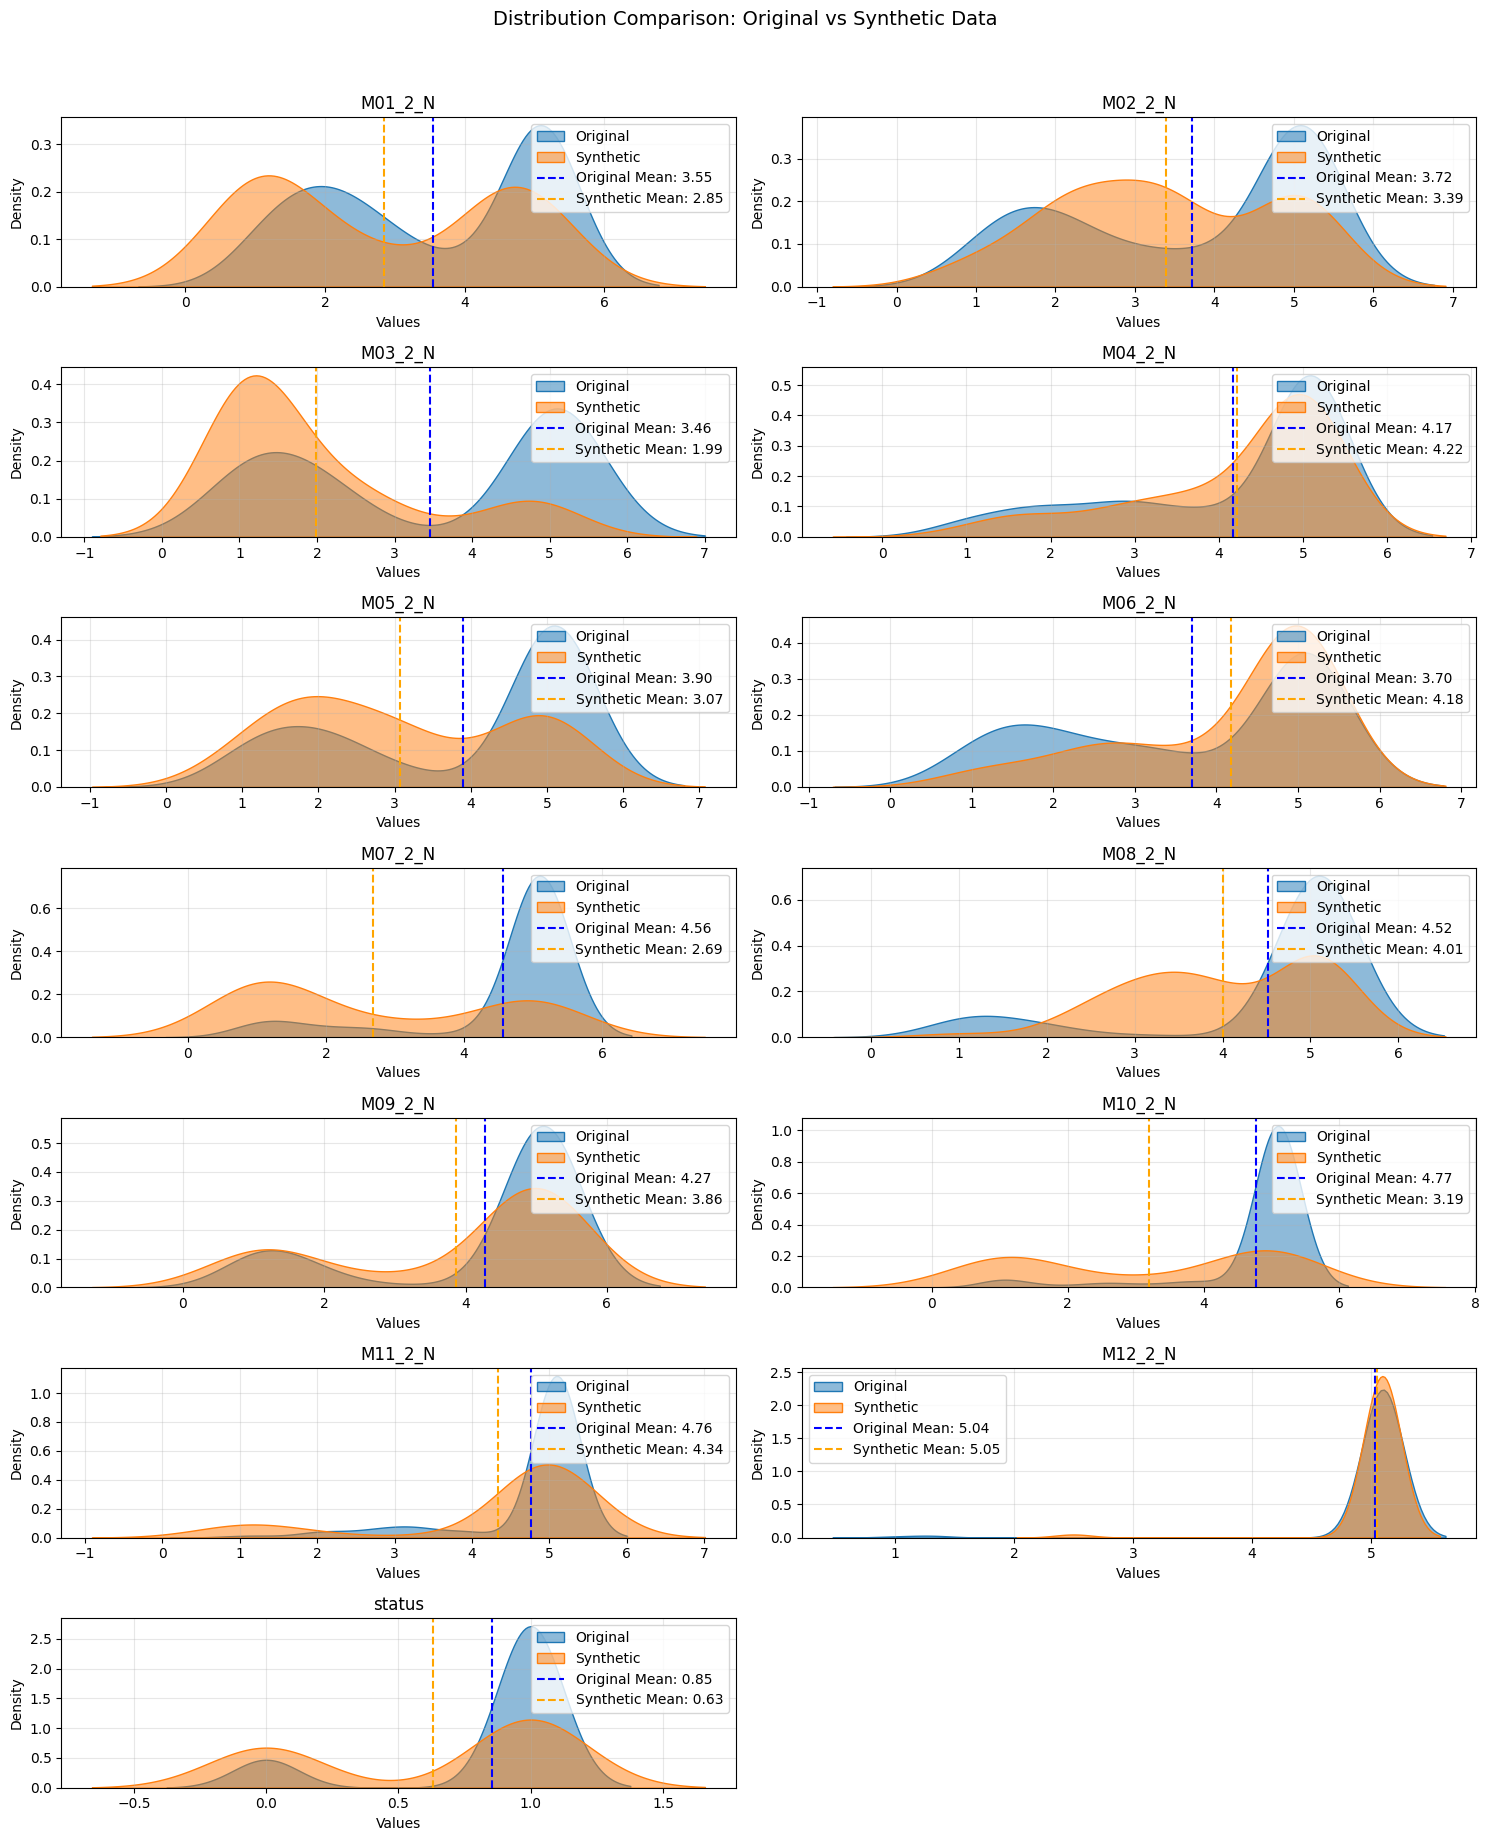

In [22]:
compare_distributions(orginal_df=BHT_2, synthetic_test=synthetic_BHT2, figsize=(15, 18))

In [23]:
# Merge stratified split of BHT_2 with synthetic data and get test split
bht2_merged = merge_real_synthetic(BHT_2, synthetic_BHT2)

# Save BHT2 train and test data
save_merged_data(bht2_merged, 'BHT2')

Distribution of status column in merged data:
1    190
0     47
Name: status, dtype: int64


### BHT 3

In [24]:
synthetic_BHT3, metadata_BHT3 = generate_synthetic_data(BHT_3)

/Users/rajwaghela/Library/Python/3.9/lib/python/site-packages/sdv/single_table/base.py:119: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

/Users/rajwaghela/Library/Python/3.9/lib/python/site-packages/sdv/single_table/base.py:104: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.



Original data distribution: {1: 114, 0: 26}
Synthetic data distribution: {0: 22, 1: 20}

Original data shape: (140, 18)
Synthetic data shape: (42, 18)


In [25]:
synthetic_BHT3.describe()

,M01_3_N,M02_3_N,M03_3_N,M04_3_N,M05_3_N,M06_3_N,M07_3_N,M08_3_N,M09_3_N,M10_3_N,M11_3_N,M12_3_N,M13_3_N,M14_3_N,M15_3_N,M16_3_N,M17_3_N,status
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,2.195238,2.250000,3.171429,3.216667,3.845238,5.066667,5.090476,3.561905,4.157143,4.335714,4.721429,4.923810,4.923810,3.173810,4.592857,4.792857,4.804762,0.476190
std,1.151871,1.468573,1.566927,1.582051,1.421988,0.057027,0.029710,1.335802,1.508212,1.351570,0.775395,0.625011,0.144508,1.763182,1.155769,0.882179,0.853673,0.505487
min,1.000000,1.000000,1.000000,1.000000,1.000000,4.900000,5.000000,1.000000,1.000000,1.000000,2.200000,1.000000,4.600000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.200000,1.000000,1.500000,1.700000,2.675000,5.000000,5.100000,2.500000,3.225000,4.725000,4.850000,5.000000,4.800000,1.300000,4.900000,5.100000,5.100000,0.000000
50%,1.850000,1.850000,3.500000,3.300000,4.450000,5.100000,5.100000,3.550000,5.100000,5.050000,5.100000,5.000000,4.900000,3.950000,5.100000,5.100000,5.100000,0.000000
75%,3.075000,2.875000,4.500000,4.775000,5.075000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.075000,4.900000,5.100000,5.100000,5.100000,1.000000
max,4.600000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,1.000000


In [26]:
diagonistic_report = run_diagnostic(
    real_data=BHT_3,
    synthetic_data=synthetic_BHT3,
    metadata=metadata_BHT3)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 18/18 [00:00<00:00, 3215.39it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 769.31it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [27]:
quality_report = evaluate_quality(      
    real_data=BHT_3,
    synthetic_data=synthetic_BHT3,
    metadata=metadata_BHT3)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 18/18 [00:00<00:00, 2532.71it/s]|
Column Shapes Score: 70.33%

(2/2) Evaluating Column Pair Trends: |██████████| 153/153 [00:00<00:00, 355.66it/s]|
Column Pair Trends Score: 77.48%

Overall Score (Average): 73.9%



In [28]:
quality_report.get_details(property_name='Column Pair Trends')


,Column 1,Column 2,Metric,Score,Real Correlation,Synthetic Correlation
0,M01_3_N,M02_3_N,CorrelationSimilarity,0.598576,0.666162,-0.136686
1,M01_3_N,M03_3_N,CorrelationSimilarity,0.641343,0.643588,-0.073725
2,M01_3_N,M04_3_N,CorrelationSimilarity,0.685534,0.567810,-0.061121
3,M01_3_N,M05_3_N,CorrelationSimilarity,0.550985,0.574589,-0.323441
4,M01_3_N,M06_3_N,CorrelationSimilarity,0.921219,0.070174,0.227736
...,...,...,...,...,...,...
148,M15_3_N,M17_3_N,CorrelationSimilarity,0.640243,0.596195,-0.123319
149,M15_3_N,status,ContingencySimilarity,0.438095,NaN,NaN
150,M16_3_N,M17_3_N,CorrelationSimilarity,0.639533,0.597586,-0.123347
151,M16_3_N,status,ContingencySimilarity,0.492857,NaN,NaN


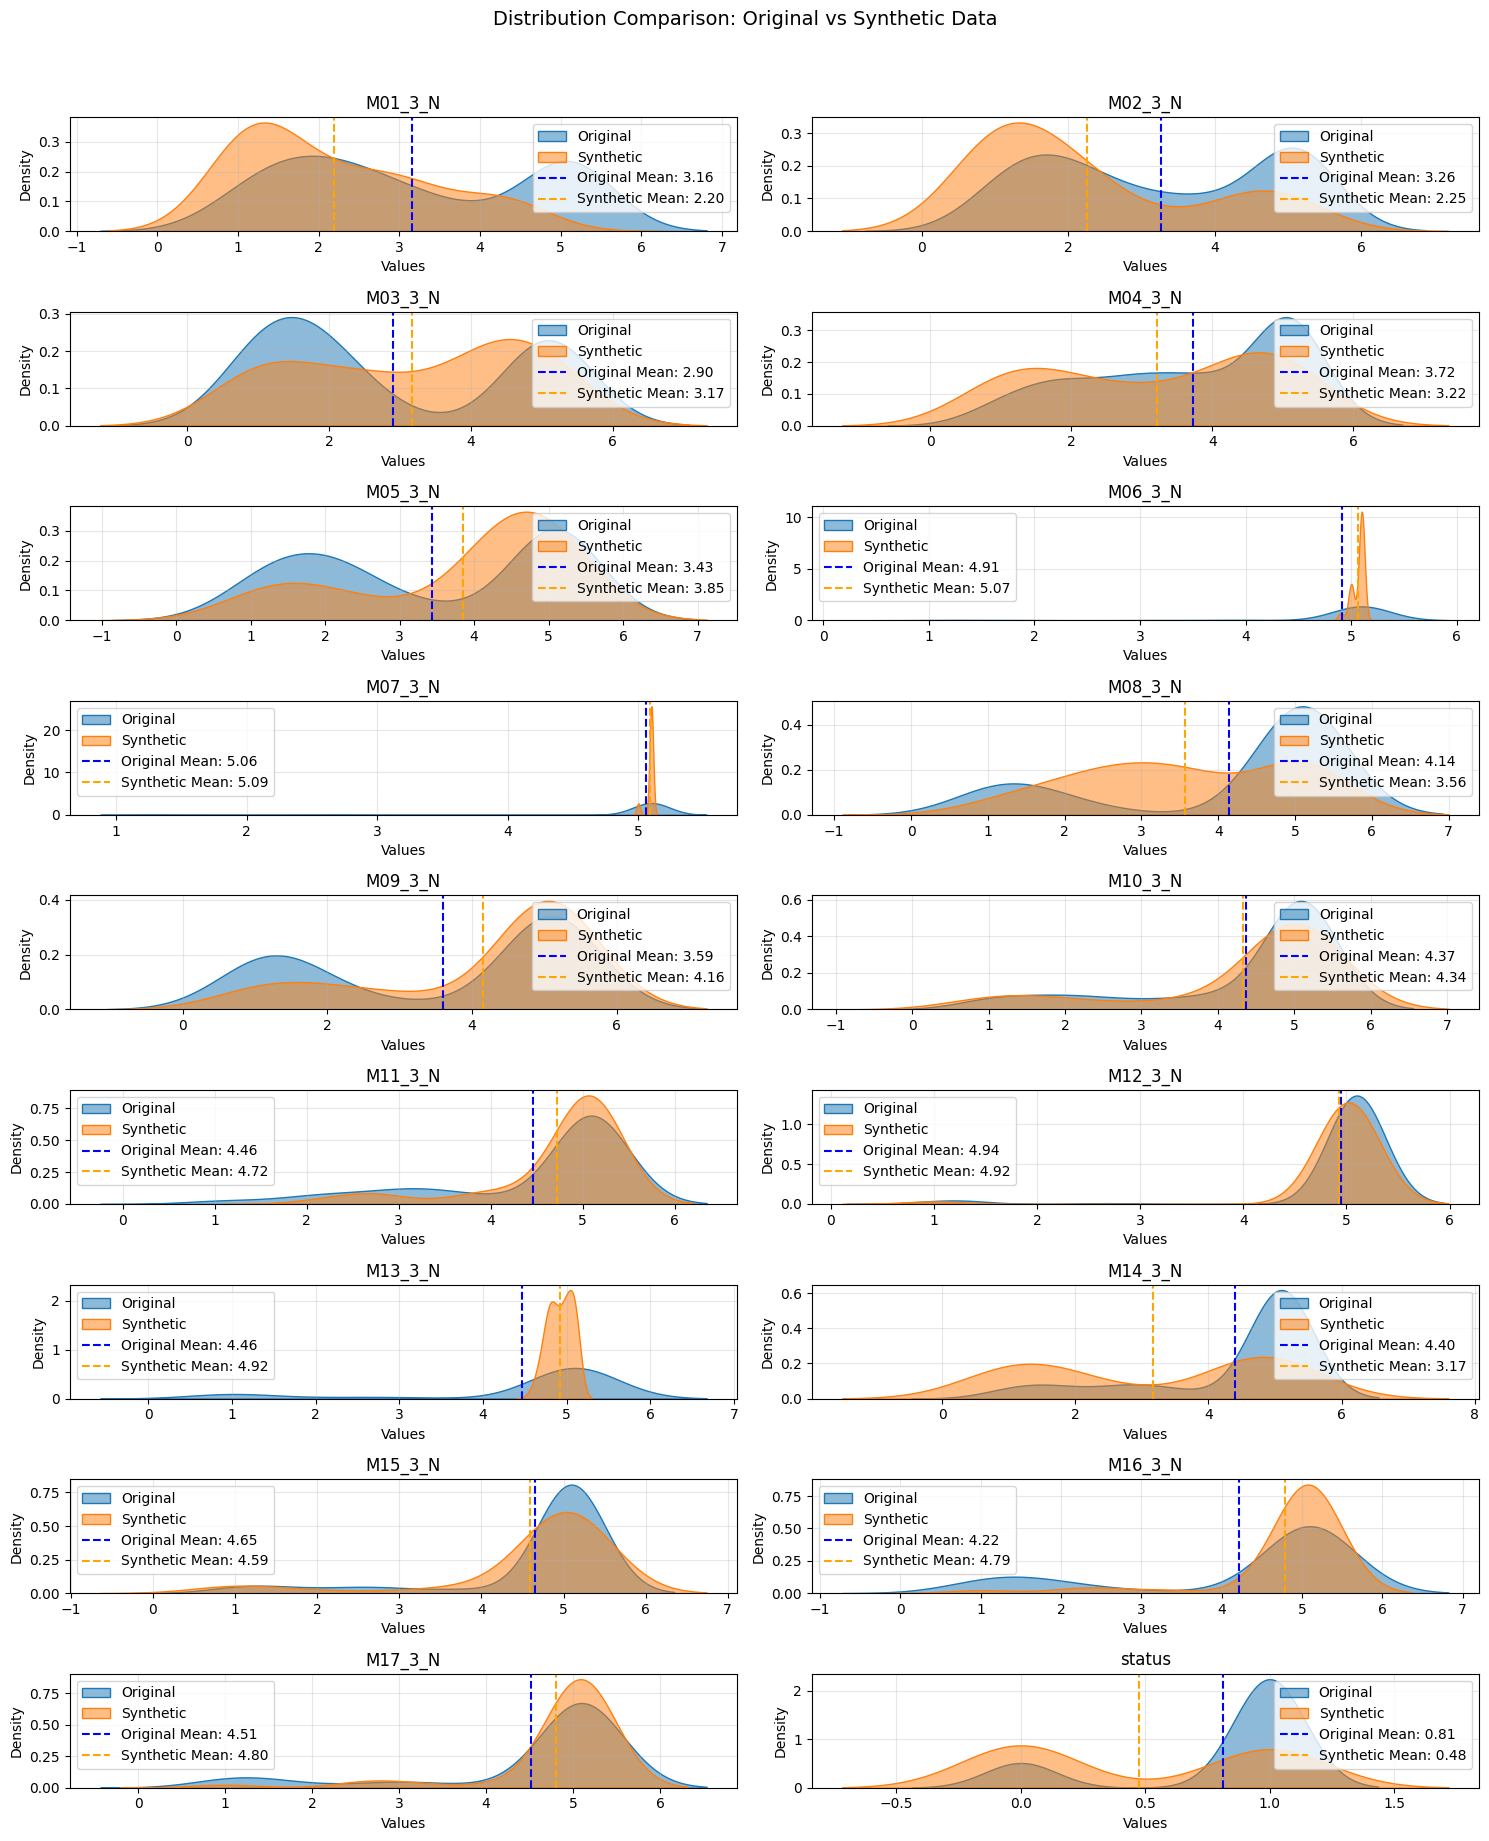

In [29]:
compare_distributions(orginal_df=BHT_3, synthetic_test=synthetic_BHT3, figsize=(15, 18))

In [30]:
# Merge stratified split of BHT_3 with synthetic data and get test split
bht3_merged = merge_real_synthetic(BHT_3, synthetic_BHT3)

# Save BHT3 train and test data
save_merged_data(bht3_merged, 'BHT3')

Distribution of status column in merged data:
1    134
0     48
Name: status, dtype: int64


### THL 1

In [31]:
synthetic_THL1, metadata_THL1 = generate_synthetic_data(THL_1)

/Users/rajwaghela/Library/Python/3.9/lib/python/site-packages/sdv/single_table/base.py:119: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

/Users/rajwaghela/Library/Python/3.9/lib/python/site-packages/sdv/single_table/base.py:104: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.



Original data distribution: {1: 423, 0: 54}
Synthetic data distribution: {1: 79, 0: 64}

Original data shape: (477, 7)
Synthetic data shape: (143, 7)


In [32]:
synthetic_THL1.describe()

,M01_1_N,M02_1_N,M03_1_N,M04_1_N,M05_1_N,M06_1_N,status
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,3.443357,4.625874,4.493007,4.785315,3.567832,4.430769,0.552448
std,1.685086,0.827921,1.102536,0.883013,1.296941,1.236034,0.498989
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.750000,4.500000,4.500000,5.000000,2.550000,4.500000,0.000000
50%,4.000000,5.100000,5.100000,5.100000,3.100000,5.100000,1.000000
75%,5.000000,5.100000,5.100000,5.100000,5.100000,5.100000,1.000000
max,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,1.000000


In [33]:
diagonistic_report = run_diagnostic(
    real_data=THL_1,
    synthetic_data=synthetic_THL1,
    metadata=metadata_THL1)


Generating report ...

(1/2) Evaluating Data Validity: |██████████| 7/7 [00:00<00:00, 1493.55it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 617.35it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [34]:
quality_report = evaluate_quality(
    real_data=THL_1,
    synthetic_data=synthetic_THL1,
    metadata=metadata_THL1)


Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 7/7 [00:00<00:00, 1108.35it/s]|
Column Shapes Score: 70.46%

(2/2) Evaluating Column Pair Trends: |██████████| 21/21 [00:00<00:00, 291.40it/s]|
Column Pair Trends Score: 68.12%

Overall Score (Average): 69.29%



In [35]:
quality_report.get_details(property_name='Column Pair Trends')

,Column 1,Column 2,Metric,Score,Real Correlation,Synthetic Correlation
0,M01_1_N,M02_1_N,CorrelationSimilarity,0.733283,0.469526,-0.063907
1,M01_1_N,M03_1_N,CorrelationSimilarity,0.825756,0.444591,0.096102
2,M01_1_N,M04_1_N,CorrelationSimilarity,0.756877,0.601779,0.115534
3,M01_1_N,M05_1_N,CorrelationSimilarity,0.804830,0.460360,0.070019
4,M01_1_N,M06_1_N,CorrelationSimilarity,0.708032,0.579538,-0.004398
5,M01_1_N,status,ContingencySimilarity,0.363504,NaN,NaN
6,M02_1_N,M03_1_N,CorrelationSimilarity,0.820048,0.377308,0.017404
7,M02_1_N,M04_1_N,CorrelationSimilarity,0.688085,0.520896,-0.102934
8,M02_1_N,M05_1_N,CorrelationSimilarity,0.692132,0.409270,-0.206467
9,M02_1_N,M06_1_N,CorrelationSimilarity,0.839191,0.337076,0.015457


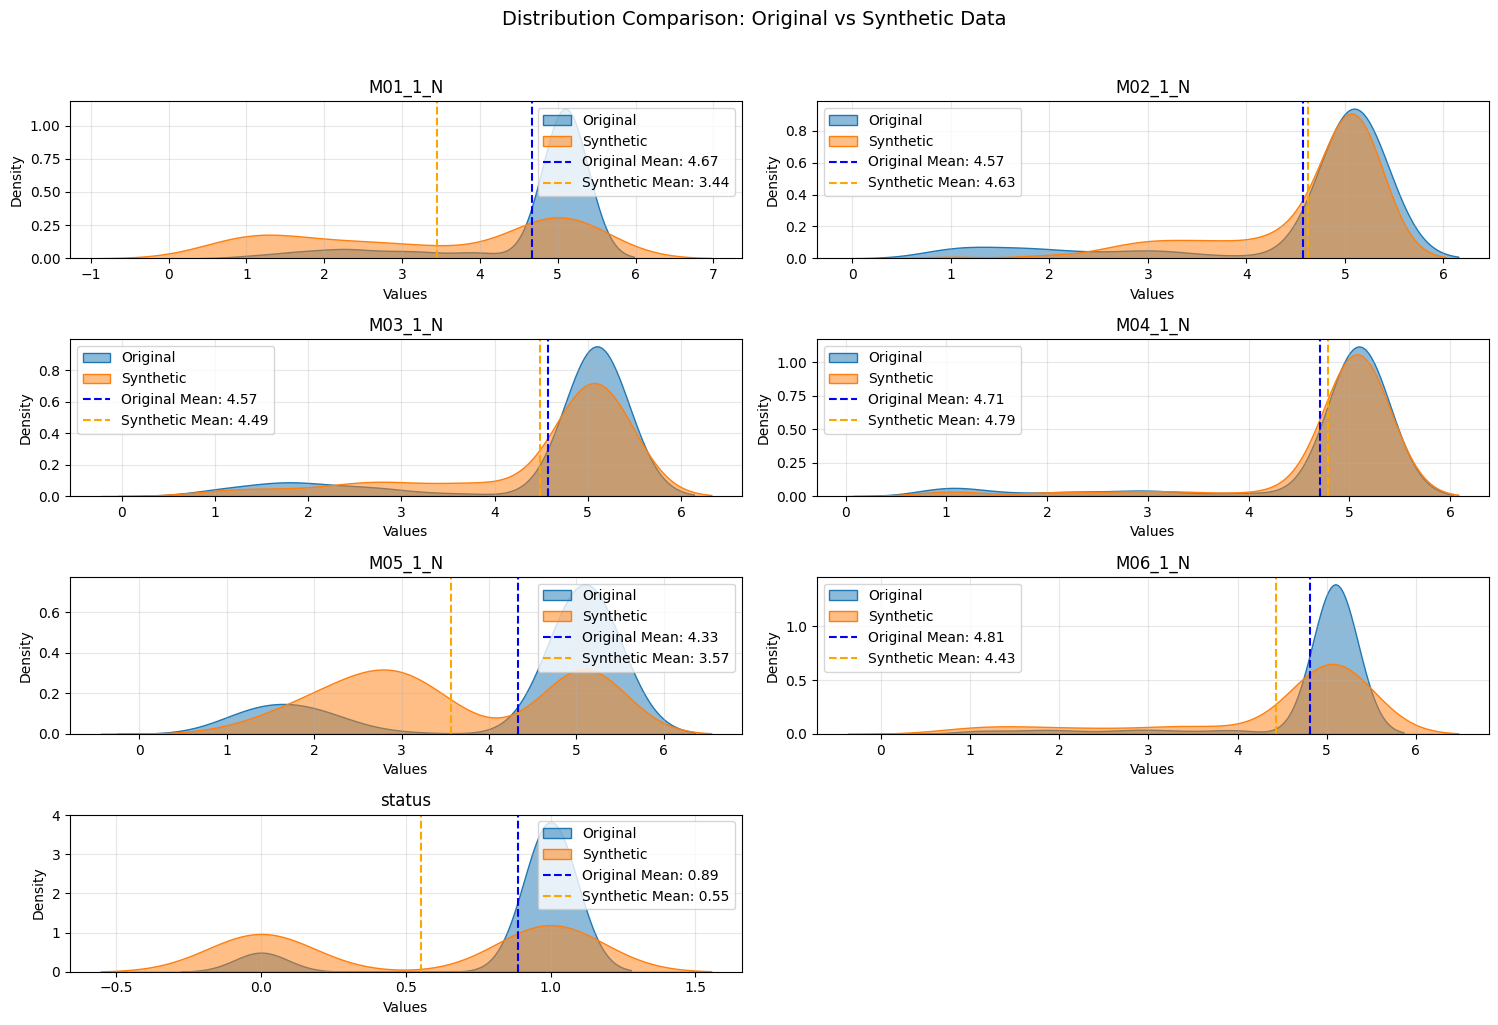

In [36]:
compare_distributions(orginal_df=THL_1, synthetic_test=synthetic_THL1)

In [37]:
# Merge stratified split of THL_1 with synthetic data and get test split
thl1_merged = merge_real_synthetic(THL_1, synthetic_THL1)

# Save THL1 train and test data
save_merged_data(thl1_merged, 'THL1')

Distribution of status column in merged data:
1    502
0    118
Name: status, dtype: int64


### THL 2

In [38]:
synthetic_THL2, metadata_THL2 = generate_synthetic_data(THL_2)

/Users/rajwaghela/Library/Python/3.9/lib/python/site-packages/sdv/single_table/base.py:119: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

/Users/rajwaghela/Library/Python/3.9/lib/python/site-packages/sdv/single_table/base.py:104: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.



Original data distribution: {1: 256, 0: 54}
Synthetic data distribution: {1: 59, 0: 34}

Original data shape: (310, 13)
Synthetic data shape: (93, 13)


In [39]:
synthetic_THL2.describe()

,M01_2_N,M02_2_N,M03_2_N,M04_2_N,M05_2_N,M06_2_N,M07_2_N,M08_2_N,M09_2_N,M10_2_N,M11_2_N,M12_2_N,status
count,93.000000,93.000000,93.000000,93.000000,93.00000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,9.300000e+01,93.000000
mean,3.758065,3.447312,4.500000,4.010753,2.85914,4.868817,4.358065,4.190323,4.260215,3.645161,4.759140,5.100000e+00,0.634409
std,1.664940,1.781950,1.085177,1.443159,1.69014,0.726513,1.398938,1.496740,1.423876,1.732836,0.788537,2.678977e-15,0.484206
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.100000,1.000000,1.000000,1.000000,1.000000,1.500000,5.100000e+00,0.000000
25%,1.800000,1.300000,4.400000,3.100000,1.30000,5.100000,4.900000,4.800000,4.800000,1.600000,5.100000,5.100000e+00,0.000000
50%,4.800000,4.800000,5.100000,4.900000,2.20000,5.100000,5.000000,4.900000,4.900000,4.900000,5.100000,5.100000e+00,1.000000
75%,4.900000,4.900000,5.100000,5.100000,4.90000,5.100000,5.100000,5.000000,5.000000,5.000000,5.100000,5.100000e+00,1.000000
max,5.100000,5.100000,5.100000,5.100000,5.10000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000e+00,1.000000


In [40]:
diagonistic_report = run_diagnostic(
    real_data=THL_2,
    synthetic_data=synthetic_THL2,
    metadata=metadata_THL2)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 13/13 [00:00<00:00, 2347.83it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 896.03it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [41]:
quality_report = evaluate_quality(
    real_data=THL_2,
    synthetic_data=synthetic_THL2,
    metadata=metadata_THL2)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 13/13 [00:00<00:00, 1855.82it/s]|
Column Shapes Score: 62.76%

(2/2) Evaluating Column Pair Trends: |██████████| 78/78 [00:00<00:00, 395.40it/s]|
Column Pair Trends Score: 73.01%

Overall Score (Average): 67.89%



In [42]:
quality_report.get_details(property_name='Column Pair Trends')

,Column 1,Column 2,Metric,Score,Real Correlation,Synthetic Correlation,Error
0,M01_2_N,M02_2_N,CorrelationSimilarity,0.738929,0.614741,0.092598,None
1,M01_2_N,M03_2_N,CorrelationSimilarity,0.736586,0.456922,-0.069907,None
2,M01_2_N,M04_2_N,CorrelationSimilarity,0.674652,0.663235,0.012540,None
3,M01_2_N,M05_2_N,CorrelationSimilarity,0.649472,0.476713,-0.224343,None
4,M01_2_N,M06_2_N,CorrelationSimilarity,0.681615,0.576549,-0.060221,None
...,...,...,...,...,...,...,...
73,M10_2_N,M12_2_N,CorrelationSimilarity,NaN,NaN,NaN,ConstantInputError: The synthetic data in colu...
74,M10_2_N,status,ContingencySimilarity,0.362366,NaN,NaN,None
75,M11_2_N,M12_2_N,CorrelationSimilarity,NaN,NaN,NaN,ConstantInputError: The synthetic data in colu...
76,M11_2_N,status,ContingencySimilarity,0.632258,NaN,NaN,None


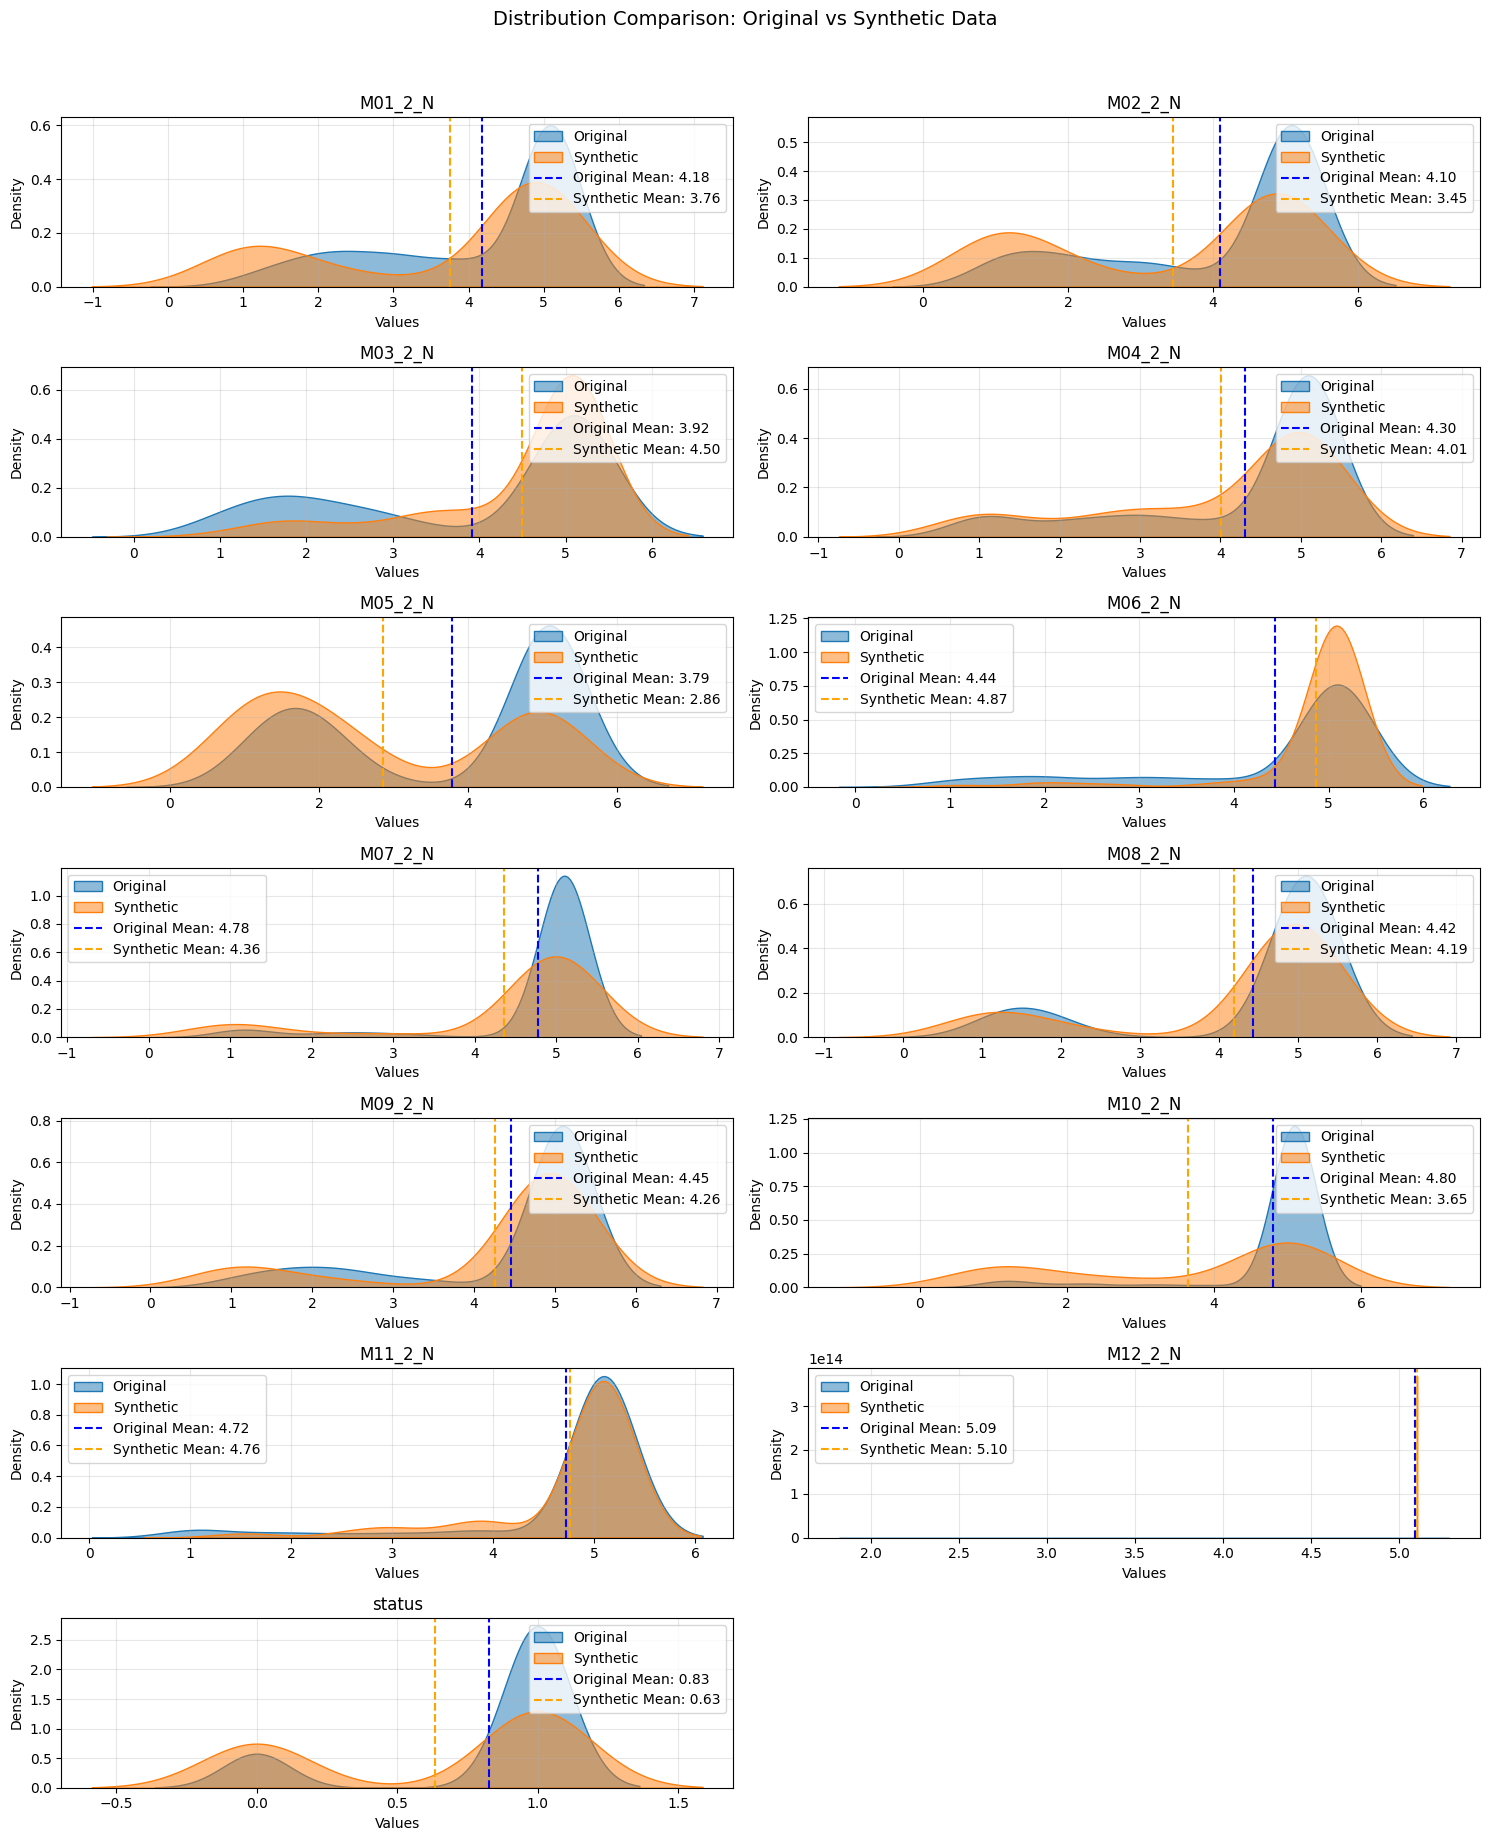

In [43]:
compare_distributions(orginal_df=THL_2, synthetic_test=synthetic_THL2, figsize=(15, 18))

In [44]:
# Merge stratified split of THL_2 with synthetic data and get test split
thl2_merged = merge_real_synthetic(THL_2, synthetic_THL2) 

# Save THL2 train and test data
save_merged_data(thl2_merged, 'THL2')

Distribution of status column in merged data:
1    315
0     88
Name: status, dtype: int64


### THL 3

In [45]:
synthetic_THL3, metadata_THL3 = generate_synthetic_data(THL_3)


/Users/rajwaghela/Library/Python/3.9/lib/python/site-packages/sdv/single_table/base.py:119: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

/Users/rajwaghela/Library/Python/3.9/lib/python/site-packages/sdv/single_table/base.py:104: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.



Original data distribution: {1: 168, 0: 54}
Synthetic data distribution: {1: 35, 0: 31}

Original data shape: (222, 18)
Synthetic data shape: (66, 18)


In [46]:
synthetic_THL3.describe()

,M01_3_N,M02_3_N,M03_3_N,M04_3_N,M05_3_N,M06_3_N,M07_3_N,M08_3_N,M09_3_N,M10_3_N,M11_3_N,M12_3_N,M13_3_N,M14_3_N,M15_3_N,M16_3_N,M17_3_N,status
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,3.448485,4.507576,3.745455,4.233333,3.296970,4.560606,3.910606,3.793939,4.121212,4.675758,3.040909,5.098485,5.040909,2.725758,4.781818,2.613636,3.583333,0.530303
std,1.603769,0.929733,1.291652,1.205926,1.590643,1.222970,1.696977,1.376940,1.273338,0.980590,1.611972,0.012309,0.230035,1.835489,0.937904,1.822921,1.751622,0.502905
min,1.000000,1.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.600000,1.000000,1.000000,1.000000,5.000000,3.700000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.925000,4.200000,3.050000,3.600000,1.925000,4.900000,2.225000,2.425000,3.000000,4.900000,1.000000,5.100000,5.100000,1.000000,4.925000,1.000000,1.625000,0.000000
50%,4.050000,5.100000,3.900000,4.800000,2.800000,5.100000,4.900000,4.750000,5.000000,5.100000,3.250000,5.100000,5.100000,1.800000,5.000000,1.100000,4.900000,1.000000
75%,4.900000,5.100000,5.100000,5.100000,5.100000,5.100000,5.000000,5.100000,5.100000,5.100000,4.875000,5.100000,5.100000,4.900000,5.100000,4.800000,5.000000,1.000000
max,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,1.000000


In [47]:
diagonistic_report = run_diagnostic(
    real_data=THL_3,
    synthetic_data=synthetic_THL3,
    metadata=metadata_THL3)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 18/18 [00:00<00:00, 2631.12it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 718.82it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [48]:
quality_report = evaluate_quality(
    real_data=THL_3,
    synthetic_data=synthetic_THL3,
    metadata=metadata_THL3)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 18/18 [00:00<00:00, 2504.15it/s]|
Column Shapes Score: 65.84%

(2/2) Evaluating Column Pair Trends: |██████████| 153/153 [00:00<00:00, 378.45it/s]|
Column Pair Trends Score: 77.85%

Overall Score (Average): 71.85%



In [49]:
quality_report.get_details(property_name='Column Pair Trends')

,Column 1,Column 2,Metric,Score,Real Correlation,Synthetic Correlation
0,M01_3_N,M02_3_N,CorrelationSimilarity,0.666363,0.645046,-0.022227
1,M01_3_N,M03_3_N,CorrelationSimilarity,0.684229,0.573127,-0.058415
2,M01_3_N,M04_3_N,CorrelationSimilarity,0.604148,0.701285,-0.090419
3,M01_3_N,M05_3_N,CorrelationSimilarity,0.735869,0.426461,-0.101801
4,M01_3_N,M06_3_N,CorrelationSimilarity,0.644832,0.557349,-0.152986
...,...,...,...,...,...,...
148,M15_3_N,M17_3_N,CorrelationSimilarity,0.871741,0.196678,-0.059840
149,M15_3_N,status,ContingencySimilarity,0.457412,NaN,NaN
150,M16_3_N,M17_3_N,CorrelationSimilarity,0.890229,0.319782,0.100241
151,M16_3_N,status,ContingencySimilarity,0.242015,NaN,NaN


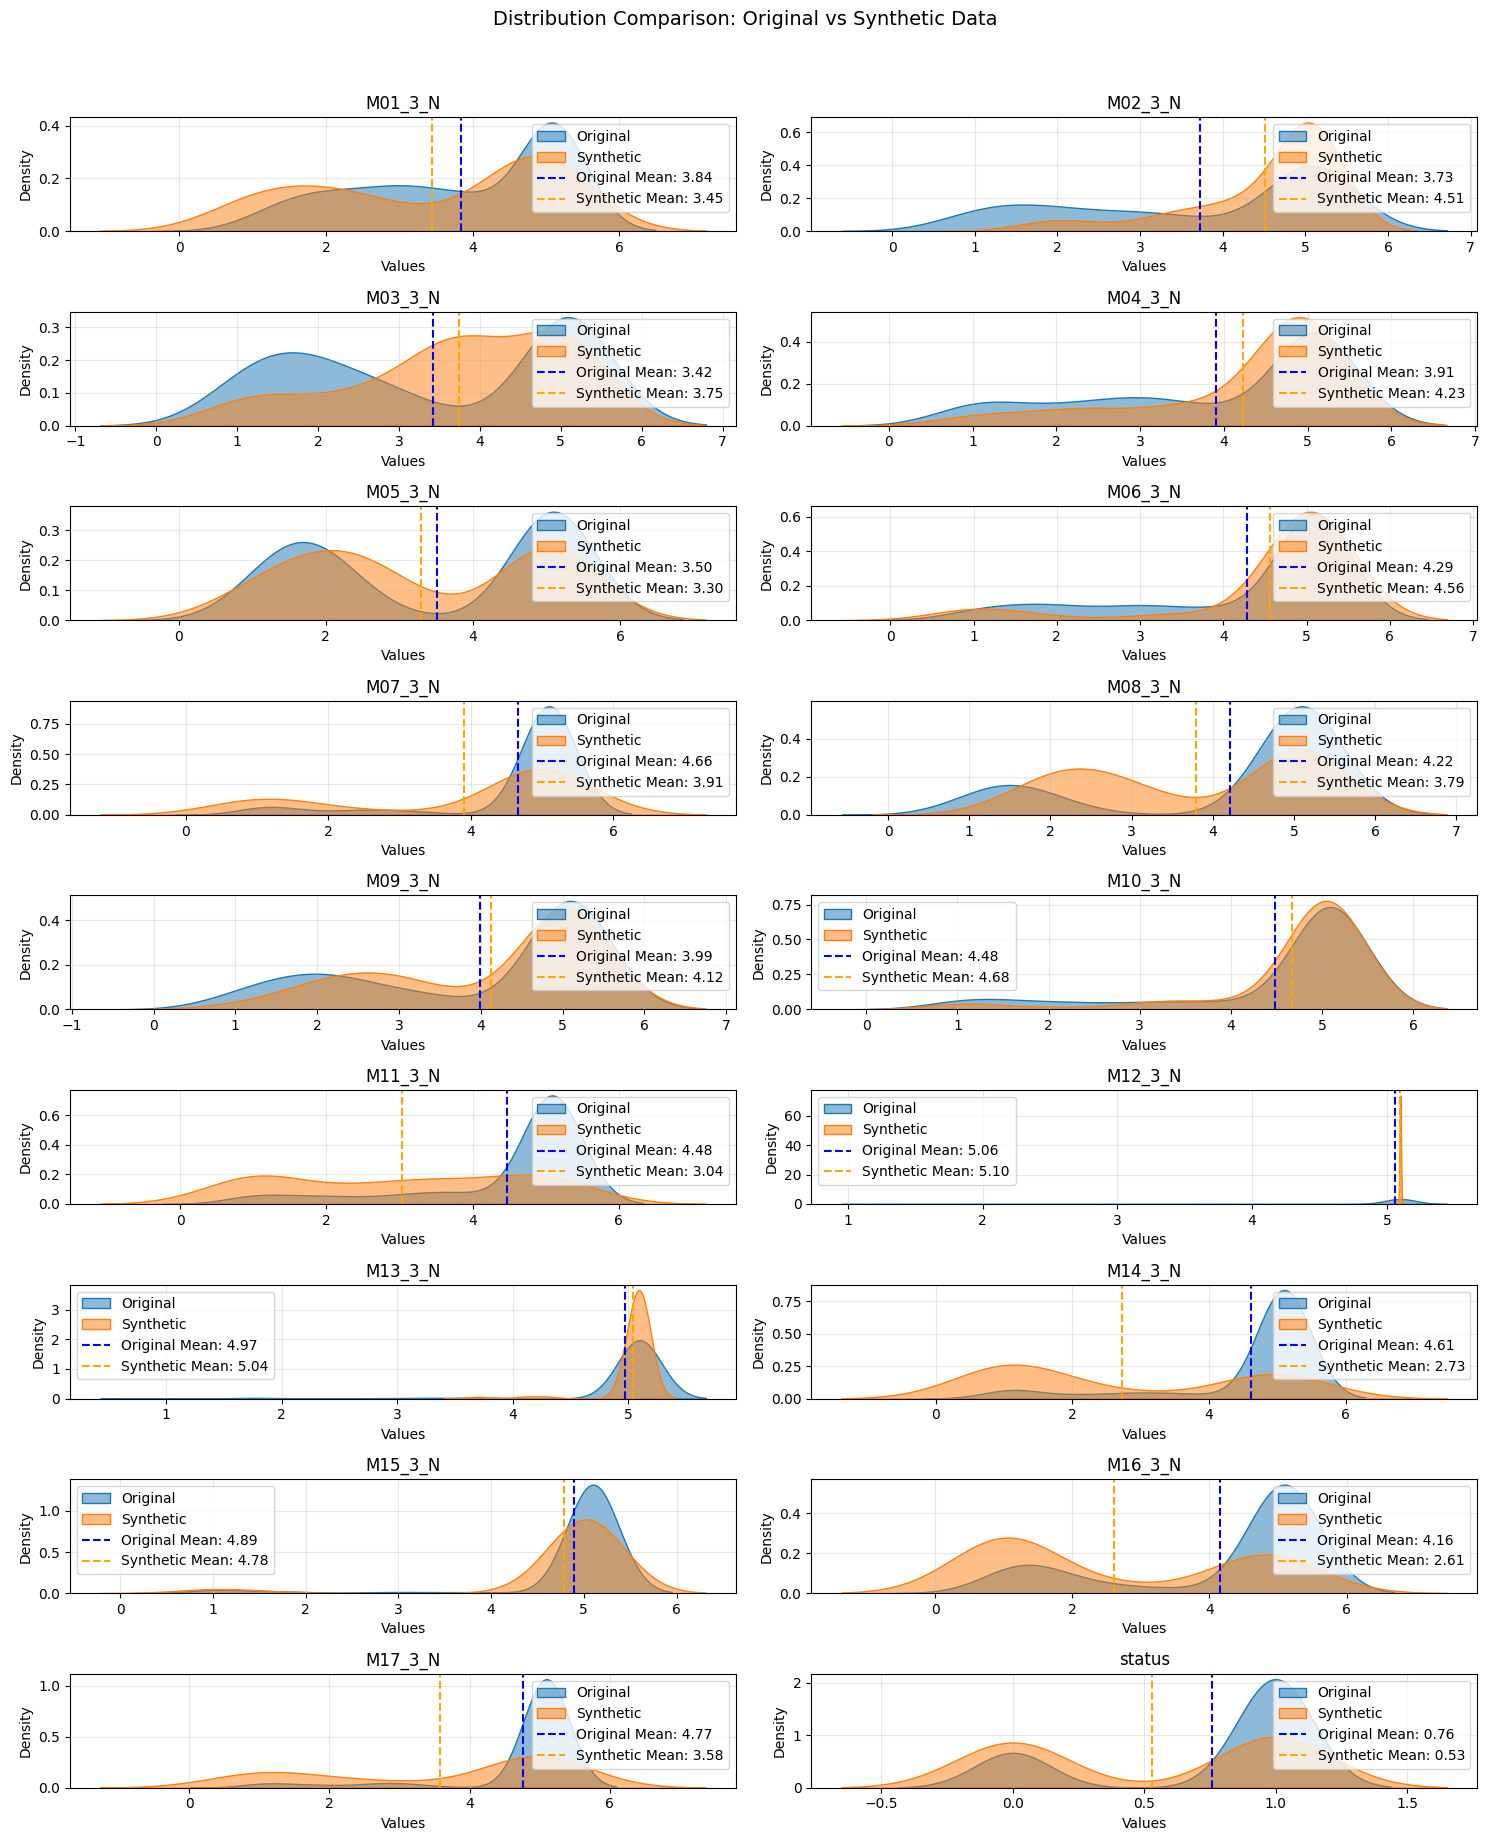

In [50]:
compare_distributions(orginal_df=THL_3, synthetic_test=synthetic_THL3, figsize=(15, 18))

In [51]:
# Merge stratified split of THL_3 with synthetic data and get test split
thl3_merged = merge_real_synthetic(THL_3, synthetic_THL3)
# Save THL3 train and test data
save_merged_data(thl3_merged, 'THL3')

Distribution of status column in merged data:
1    203
0     85
Name: status, dtype: int64
